# Bike Sharing Case Study Assignment

### 1. Reading and Understanding the Data

In [1]:
#Importing all the relevant packages required:

import warnings #To suppress warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd #To work on the DataFrame
import matplotlib.pyplot as plt #Visualization
%matplotlib inline
import seaborn as sns #Visualization
from sklearn.model_selection import train_test_split  #To split train and test data
from sklearn.preprocessing import MinMaxScaler  #For rescaling the data
import statsmodels.api as sm  #Building model using stasmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor  #Checking the multicollinearity - VIF
from sklearn.metrics import r2_score #Checking R score
from sklearn.feature_selection import RFE #For feature elimination
from sklearn.linear_model import LinearRegression #Regression class for model building

In [2]:
#Reading the data
bike=pd.read_csv(r"C:\Users\Yogesh\Desktop\Bike_Sharing_Assignment\day.csv")

In [3]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Shape of the data
bike.shape

(730, 16)

In [5]:
#Column info of the data
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Description of the numerical columns 
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#Checking if there are any null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### 2. Data Preparation

#### There are few columns in the dataset that we can drop based on their importance.

In [8]:
#Dropping the Date column, as we already have seperate columns for month and year. 
#Also this column may creae issue while creating model as regression model is based on numerical data.
bike.drop('dteday',axis=1,inplace=True)


In [9]:
##Dropping the instant column, we can see that it is just like an index column.
bike.drop(['instant'],axis=1,inplace=True)


In [10]:
#Since cnt is our target variable, therefore we will not be considering the registered and casual columns
bike.drop(['registered'],axis=1,inplace=True)
bike.drop(['casual'],axis=1,inplace=True)


In [11]:
#Checking if all the above-mentioned columns are dropped or not
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### As per the data definition and data preparation requirements, there are few categorical variables which needs to be updated as per the data definition file.

In [12]:
#Mapping season column as per the dataset dictionary
bike['season'] = bike['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [13]:
#Mapping weekday column as per the dataset dictionary
bike['weekday'] = bike['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

In [14]:
#Mapping weathersit column as per the dataset dictionary
bike['weathersit'] = bike['weathersit'].map({1:"Clear",2:"Mist",3:"Light",4:"Heavy"})

In [15]:
#Mapping mnth column as per the month labels
bike['mnth'] = bike['mnth'].map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"June",7:"July",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})

In [16]:
#Cross-checking if the categorical values have been changed 
bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,Saturday,0,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,Sunday,0,Mist,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,Jan,0,Monday,1,Mist,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,Jan,0,Tuesday,1,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,Jan,0,Wednesday,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


In [17]:
#We can see that 'season', 'mnth'. 'weathersit' and  'weekday' columns have changed Dtype to object
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### 3. Visualising the Data

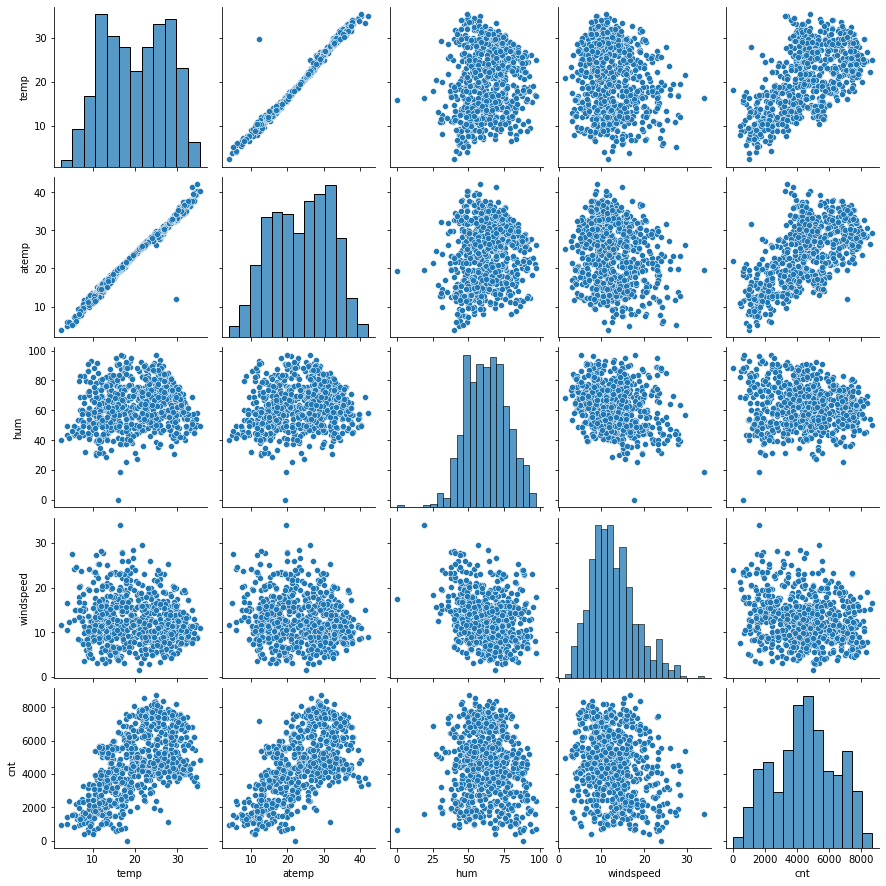

In [18]:
#Making a pairplot of the numeric variables

sns.pairplot(bike, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

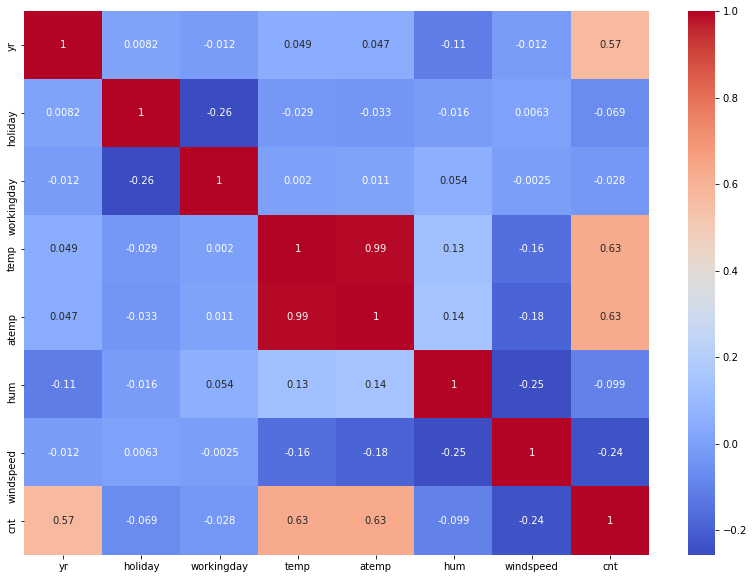

In [19]:
#Plotting Co-relation heatmap to check higher co-related variables

plt.figure(figsize = (14, 10))
sns.heatmap(bike.corr(), annot = True, cmap="coolwarm")
plt.show()



In [20]:
#The correlation between atemp and temp is 0.99, which mean highly co-related, therefore we can drop 'atemp'
bike.drop(['atemp'],axis=1,inplace=True)


In [21]:
#Checking the dataset after dropping atemp
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


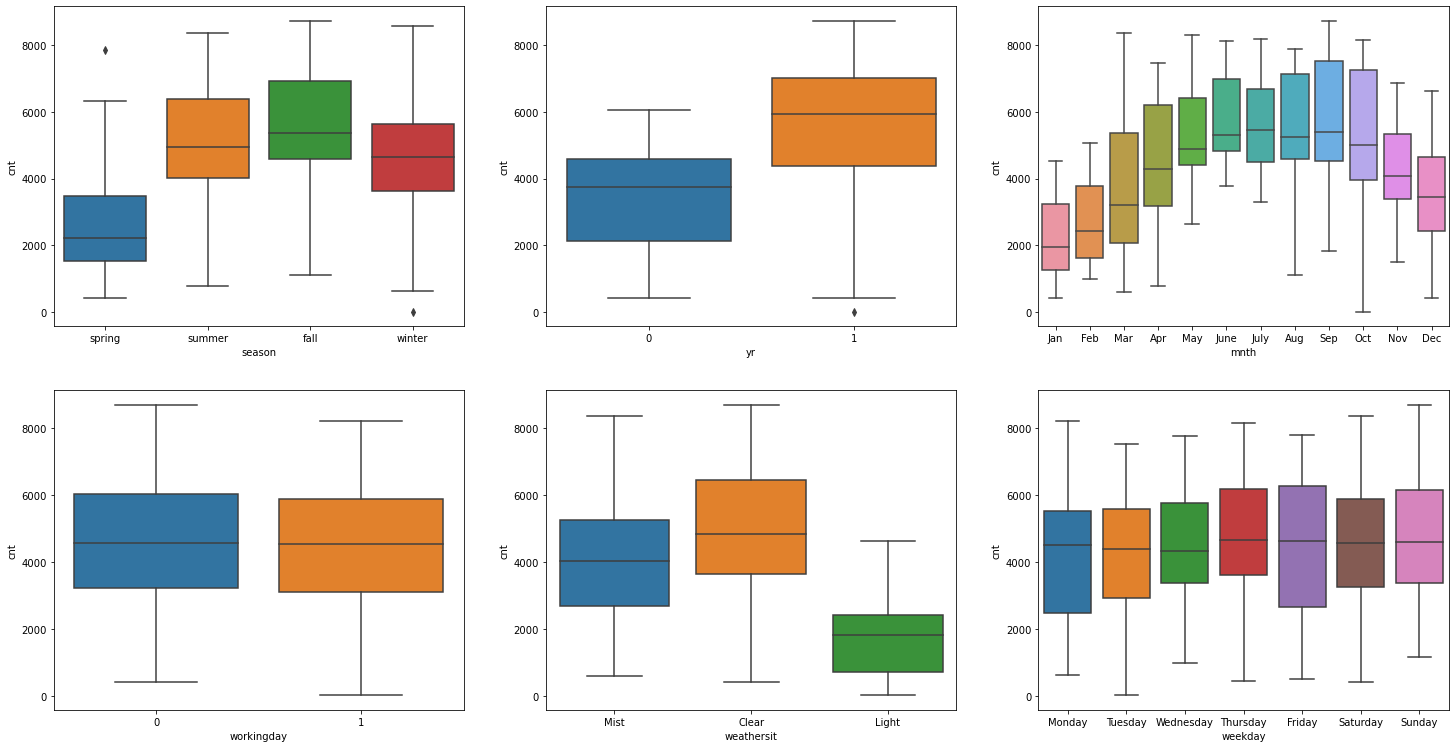

In [22]:
#Making boxplots for some of the categorical variables.
plt.figure(figsize=(25, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.show()

##### Creating Dummy variables - 'season',  'weekday', 'weathersit' and 'mnth'

In [23]:
#Creating dummy variables for all the categorical variables and also dropping the base

Seasons=pd.get_dummies(bike['season'],drop_first=True)
Day_of_week=pd.get_dummies(bike['weekday'],drop_first=True)
Weathers=pd.get_dummies(bike['weathersit'],drop_first=True)
Months=pd.get_dummies(bike['mnth'],drop_first=True)#It will create columns from 2 to 12 as 1 will be the base dummy value-0 

In [24]:
#Concatenating all the newly created dummy columns in the dataframe
bike=pd.concat([bike,Seasons],axis=1)
bike=pd.concat([bike,Weathers],axis=1)
bike=pd.concat([bike,Day_of_week],axis=1)
bike=pd.concat([bike,Months],axis=1)


In [25]:
#Checking the total number of columns afetr contatenating the dummy columns
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'spring', 'summer',
       'winter', 'Light', 'Mist', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June',
       'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

In [26]:
#Dropping all the columns for which the dummy columns have been created.
bike.drop(['season'],axis=1,inplace=True)
bike.drop(['weekday'],axis=1,inplace=True)
bike.drop(['weathersit'],axis=1,inplace=True)
bike.drop(['mnth'],axis=1,inplace=True)


In [27]:
#Checking the final columns after dropping above columns
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Light', 'Mist', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Aug', 'Dec', 'Feb',
       'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

### 4. Splitting the Data into Training and Testing Sets

In [28]:
# Specifying this so that the train and test data set always have the same rows
#Splitting the data into 70:30 ratio for train and test respectively
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
#Diving the test dataset - 'bike_test' into y_train and y_test containing dependent variables 
y_train = bike_train.pop('cnt')
y_test = bike_test.pop('cnt')

#Diving the train dataset - 'bike_train' into X_train and X_test containing independent variables 
X_train = bike_train
X_test = bike_test



In [30]:
#Scaling
#Creating object of the MinMaxScaler()
scaler=MinMaxScaler()
# Apply scaler() to the columns except the 0 or 1/categorical columns
min_max=['temp','hum','windspeed']
X_train[min_max] = scaler.fit_transform(bike_train[min_max])

In [31]:
#Checking newly scaled Train dataset
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Light,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#Checking for the min and max of all the numerical columns i.e. should be 0 and 1
X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Light,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.243137,0.245098,0.24902,0.029412,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.429398,0.430568,0.43287,0.169124,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Using Recursive feature elimination for feature selection

In [33]:
#We are using the Recursive feature elimination technique to find the best variables for prediction

lr = LinearRegression()
lr.fit(X_train, y_train)

rfe_model = RFE(lr, 16)            
rfe_model = rfe_model.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns,rfe_model.support_,rfe_model.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light', True, 1),
 ('Mist', True, 1),
 ('Monday', False, 7),
 ('Saturday', False, 3),
 ('Sunday', False, 4),
 ('Thursday', False, 11),
 ('Tuesday', False, 6),
 ('Wednesday', False, 9),
 ('Aug', False, 8),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('Mar', False, 13),
 ('May', False, 5),
 ('Nov', True, 1),
 ('Oct', False, 10),
 ('Sep', True, 1)]

In [35]:
#Taking all the columns which are True
lr_columns = X_train.columns[rfe_model.support_]
lr_columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Light', 'Mist', 'Dec', 'Feb', 'Jan', 'July', 'Nov', 'Sep'],
      dtype='object')

In [36]:
#Taking the specified True columns from the X_train split dataset in a variable
X_train_lr = X_train[lr_columns]

### 5. Building a linear model using Statsmodel

##### We will start with taking all the independent variables and then we will remove the variable based on high P-value followed by high VIF value 

In [37]:
# Add a constant
X_train_lr1 = sm.add_constant(X_train_lr)

# Create a first fitted model
lr1 = sm.OLS(y_train,X_train_lr1).fit()

In [38]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.7
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.15e-188
Time:                        10:12:27   Log-Likelihood:                -4109.6
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     493   BIC:                             8325.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2907.8655    318.654      9.125      0.0

In [39]:
#Checking the VIF of the the column variables

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_lr.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_lr.values, i)
                          for i in range(len(X_train_lr.columns))]
  
print(vif_data)

      Feature        VIF
0          yr   2.092231
1     holiday   1.062648
2        temp  18.335900
3         hum  31.576846
4   windspeed   4.732066
5      spring   5.445783
6      summer   2.810159
7      winter   4.062761
8       Light   1.281087
9        Mist   2.323993
10        Dec   1.669769
11        Feb   1.918901
12        Jan   2.377060
13       July   1.598575
14        Nov   1.855589
15        Sep   1.411565


#### Dropping the Variable and Updating the Model

In [40]:
#Dropping Feb column as it has high P-value
X_train_lr.drop('Feb',axis=1,inplace=True)

In [41]:
# Add a constant
X_train_lr2 = sm.add_constant(X_train_lr)

# Create a second fitted model
lr2 = sm.OLS(y_train,X_train_lr2).fit()

In [42]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          3.34e-189
Time:                        10:12:28   Log-Likelihood:                -4111.1
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     494   BIC:                             8322.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2805.5562    313.247      8.956      0.0

In [43]:
#Checking the VIF of the the column variables

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_lr.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_lr.values, i)
                          for i in range(len(X_train_lr.columns))]
  
print(vif_data)

      Feature        VIF
0          yr   2.088118
1     holiday   1.059432
2        temp  17.795518
3         hum  30.939617
4   windspeed   4.719884
5      spring   4.369102
6      summer   2.805602
7      winter   4.058890
8       Light   1.276712
9        Mist   2.318153
10        Dec   1.550111
11        Jan   1.745893
12       July   1.594165
13        Nov   1.831854
14        Sep   1.410973


#### Dropping the Variable and Updating the Model

In [44]:
#Dropping hum column as it has a high VIF
X_train_lr.drop('hum',axis=1,inplace=True)

In [45]:
# Add a constant
X_train_lr3 = sm.add_constant(X_train_lr)

# Create a third fitted model
lr3 = sm.OLS(y_train,X_train_lr3).fit()

In [46]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.57e-186
Time:                        10:12:28   Log-Likelihood:                -4120.2
No. Observations:                 510   AIC:                             8270.
Df Residuals:                     495   BIC:                             8334.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2165.7529    279.173      7.758      0.0

In [47]:
#Checking the VIF of the the column variables

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_lr.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_lr.values, i)
                          for i in range(len(X_train_lr.columns))]
  
print(vif_data)

      Feature       VIF
0          yr  2.073683
1     holiday  1.059430
2        temp  5.168995
3   windspeed  4.665765
4      spring  2.888464
5      summer  2.228255
6      winter  2.935584
7       Light  1.087191
8        Mist  1.559876
9         Dec  1.459154
10        Jan  1.656100
11       July  1.593614
12        Nov  1.798723
13        Sep  1.352280


#### Dropping the Variable and Updating the Model

In [48]:
#Dropping temp column as it has a high VIF >5
X_train_lr.drop('temp',axis=1,inplace=True)

In [49]:
# Add a constant
X_train_lr4 = sm.add_constant(X_train_lr)

# Create a fourth fitted model
lr4 = sm.OLS(y_train,X_train_lr4).fit()

In [50]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          5.50e-160
Time:                        10:12:29   Log-Likelihood:                -4186.1
No. Observations:                 510   AIC:                             8400.
Df Residuals:                     496   BIC:                             8459.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5203.6812    137.967     37.717      0.0

#### Dropping the Variable and Updating the Model

In [51]:
#Dropping July column as it has high P-value
X_train_lr.drop('July',axis=1,inplace=True)

In [52]:
# Add a constant
X_train_lr5 = sm.add_constant(X_train_lr)

# Create a fifth fitted model
lr5 = sm.OLS(y_train,X_train_lr5).fit()

In [53]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     158.0
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          6.36e-161
Time:                        10:12:29   Log-Likelihood:                -4186.5
No. Observations:                 510   AIC:                             8399.
Df Residuals:                     497   BIC:                             8454.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5143.3375    120.300     42.754      0.0

#### Dropping the Variable and Updating the Model

In [54]:
#Dropping winter column as it has high P-value
X_train_lr.drop('winter',axis=1,inplace=True)

In [55]:
# Add a constant
X_train_lr6 = sm.add_constant(X_train_lr)

# Create a sixth fitted model
lr6 = sm.OLS(y_train,X_train_lr6).fit()

In [56]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     172.3
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          7.42e-162
Time:                        10:12:30   Log-Likelihood:                -4187.0
No. Observations:                 510   AIC:                             8398.
Df Residuals:                     498   BIC:                             8449.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5102.7644    112.476     45.367      0.0

In [57]:
#Checking the VIF of the the column variables

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_lr.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_lr.values, i)
                          for i in range(len(X_train_lr.columns))]
  
print(vif_data)

      Feature       VIF
0          yr  1.739386
1     holiday  1.058480
2   windspeed  3.220279
3      spring  2.363509
4      summer  1.692595
5       Light  1.064930
6        Mist  1.474179
7         Dec  1.125918
8         Jan  1.624159
9         Nov  1.231851
10        Sep  1.161283


#### We have now stopped the model building as all the variables have P-value and VIF value within the limits
#### We see that model lr6 has provided good results

### 6. Residual Analysis of the train data

In [58]:
#Predict values
y_pred = lr6.predict(X_train_lr6)

Text(0.5, 0, 'Errors')

<Figure size 1440x864 with 0 Axes>

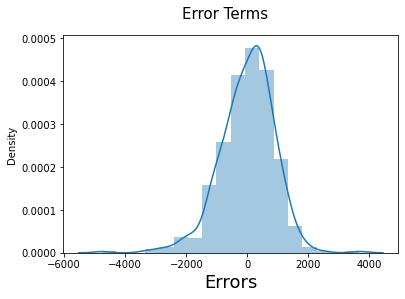

In [59]:
#Checking Asuumptions of Normality:
#Plotting the graph of the error terms
plt.figure(figsize=(20,12))
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 18)
fig.suptitle('Error Terms', fontsize = 15)                  
plt.xlabel('Errors', fontsize = 18)                        

### 7. Making Predictions Using the Final Model

In [60]:
#Checking columns of the final train model
X_train_lr6.columns

Index(['const', 'yr', 'holiday', 'windspeed', 'spring', 'summer', 'Light',
       'Mist', 'Dec', 'Jan', 'Nov', 'Sep'],
      dtype='object')

In [61]:
#Scaling the test data

min_max_test=['temp','hum','windspeed']
bike_test[min_max_test] = scaler.transform(bike_test[min_max_test])

In [62]:
X_train_new=X_train_lr6.drop(['const'], axis=1)

In [63]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [64]:
#Making predictions on the chosen model
y_pred = lr6.predict(X_test_new)

### 8. Model Evaluation

Text(0, 0.5, 'y_pred')

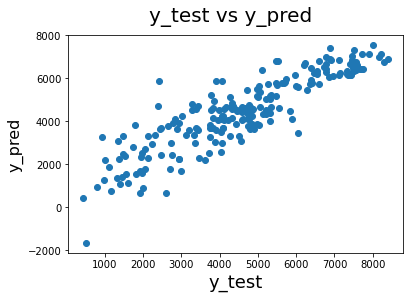

In [65]:
#Checking ys_test data vs y_pred data
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [66]:
#Calculate the r square for test

r2score= r2_score(y_test, y_pred)
r2score #R square for the model is 77.72

0.77720120918437

In [67]:
#Printing the model summary to check and create the best fit line
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     172.3
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          7.42e-162
Time:                        10:12:32   Log-Likelihood:                -4187.0
No. Observations:                 510   AIC:                             8398.
Df Residuals:                     498   BIC:                             8449.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5102.7644    112.476     45.367      0.0

### Best fitted line equation:

### cnt= 2134.86 X yr - 743.01 X holiday -  1660.26 X windspeed - 2061.78 X spring - 340.99 X summer -  2746.86 X Light - 768.18 X Mist - 1016.31 X Dec - 1055.98 X Jan - 962.25 X Nov + 523.47 X Sep